<a href="https://colab.research.google.com/github/ipek-yilmaz/US-Stocks-2014-2018--prediction-with-Tensorflow/blob/master/US_Stocks(2014_2018)_prediction_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

### Importing the training set



In [ ]:
dataframe1 = pd.read_csv("2014_Financial_Data.csv")
dataframe2 = pd.read_csv("2015_Financial_Data.csv")
dataframe3 = pd.read_csv("2016_Financial_Data.csv")
dataframe4 = pd.read_csv("2017_Financial_Data.csv")
dataframe5 = pd.read_csv("2018_Financial_Data.csv")

In [ ]:
dataframe1.head()

,Corporation,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,...,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.0,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,2.851000e+09,1.420000e+08,-1.127000e+09,1.164300e+10,0.0,1.164300e+10,4.1900,4.010,2.705960e+09,2.705960e+09,2.448,0.4754,0.2470,0.2043,0.1560,0.1359,1.834400e+10,1.520300e+10,1.178500e+10,0.1948,0.1565,8.558000e+09,2.128000e+09,1.068600e+10,6.386000e+09,6.759000e+09,3.161700e+10,2.230400e+10,8.454700e+10,...,1.5648,10.8869,0.1664,-1.4220,-0.1185,-0.0001,0.0067,0.0293,0.0371,0.0389,-0.0127,NaN,0.0699,-0.0615,-0.0695,0.0323,0.0088,-0.0182,0.0355,0.0015,0.0260,0.0603,-0.0137,0.0060,0.1442,0.0353,0.0201,0.1013,0.0834,0.0751,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,108330319.7,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,3.955957e+07,-1.431918e+07,0.000000e+00,1.358227e+08,0.0,1.358227e+08,0.2396,0.226,NaN,1.829362e+07,0.000,0.2487,0.0107,0.0502,0.0058,0.0704,2.456858e+08,1.875310e+08,1.215036e+08,0.0470,0.0364,7.735149e+08,6.083852e+08,1.381900e+09,1.169487e+07,5.793193e+08,2.134397e+09,3.085975e+08,1.906587e+08,...,NaN,NaN,0.3294,-17.8582,1.2489,1.6142,1.9463,1.5649,1.4625,1.4646,0.0184,0.0195,0.0000,0.2134,-0.3626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.0,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,2.270000e+09,7.510000e+08,1.200000e+07,0.000000e+00,1.519000e+09,0.0,1.519000e+09,1.4700,1.450,1.033053e+09,1.028000e+09,0.307,0.2057,0.0450,0.0276,0.0150,0.0126,4.416000e+09,2.713000e+09,1.531000e+09,0.0231,0.0154,4.010000e+08,0.000000e+00,4.010000e+08,1.116000e+09,5.651000e+09,8.830000e+09,1.689300e+10,2.837000e+09,...,4.9593,18.2227,0.2821,-2.2665,0.0173,-0.0145,-0.0141,0.0147,0.0576,0.0469,-0.0356,-0.0317,0.2429,0.2095,0.3935,0.1027,0.1038,0.1399,0.0889,0.0937,0.0946,0.2272,0.0906,0.1892,0.0676,0.0558,0.0789,0.0000,0.1215,0.1633,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.0,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,2.502180e+08,8.040000e+05,0.0

### Concatenation all dataset

In [ ]:
dataFrame = pd.concat([dataframe1,dataframe2,dataframe3,dataframe4,dataframe5], axis=0)

In [ ]:
dataFrame.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,...,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2015 PRICE VAR [%],Class,2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%]
count,2.090600e+04,19989.000000,2.030600e+04,2.087000e+04,1.993900e+04,2.040800e+04,2.037500e+04,2.097600e+04,2.035800e+04,2.071300e+04,2.048900e+04,1.981800e+04,1.981800e+04,2.051200e+04,1.981800e+04,2.068600e+04,2.077600e+04,2.078500e+04,2.058300e+04,2.014000e+04,19818.000000,20878.000000,19630.000000,20403.000000,19633.000000,19786.000000,2.032300e+04,2.065200e+04,2.051000e+04,20882.000000,20355.000000,2.089800e+04,1.936500e+04,1.960200e+04,2.097200e+04,2.024600e+04,1.955500e+04,2.041800e+04,2.064000e+04,1.944400e+04,...,1.966400e+04,20069.000000,19736.000000,20109.000000,19695.000000,19894.000000,1.988400e+04,19269.000000,1.815500e+04,19608.000000,20014.000000,19603.000000,12545.000000,15676.000000,17611.000000,12599.000000,15713.000000,17644.000000,12545.000000,15676.000000,17611.000000,12397.000000,15467.000000,17434.000000,12900.000000,16299.000000,18264.000000,19952.000000,19650.000000,19690.000000,19213.000000,19462.000000,19598.000000,19655.000000,3.808000e+03,22077.000000,4120.000000,4.797000e+03,4960.000000,4392.000000
mean,5.161619e+09,3.622214,3.258565e+09,1.970452e+09,1.033333e+08,8.699279e+08,1.368670e+09,5.896979e+08,9.778939e+07,4.925003e+08,1.300020e+08,1.339006e+07,-3.240313e+06,3.886727e+08,4.673906e+06,3.871254e+08,-1.065748e+04,-1.073582e+04,2.631767e+08,2.664926e+08,1.215392,0.487844,-8.880591,-7.258787,-9.307057,-6.293523,9.289820e+08,6.161903e+08,4.016908e+08,-7.214756,-7.280513,1.894710e+09,1.388023e+09,3.088980e+09,9.761184e+08,5.040023e+08,5.381981e+09,2.714136e+09,1.731174e+09,2.930937e+09,...,-1.880031e+04,18.951545,0.807740,0.462037,-2.230354,0.283367,1.995813e+03,13.208976,1.896110e+02,0.158222,64.109584,-3.544642,0.021051,0.028228,0.040704,0.037766,0.047250,0.064219,0.030847,0.056921,0.072423,0.033468,0.039182,0.047642,-0.026190,-0.000596,0.012298,10.978239,0.158858,1.134221,0.783208,3.733922,0.295610,0.365149,9.751560e+02,0.550754,103.077642,3.650260e+02,-4.461547,20.803948
std,3.197314e+10,312.648170,2.583093e+10,8.735750e+09,7.676062e+08,3.804283e+09,5.662984e+09,2.976454e+09,4.996543e+08,2.484345e+09,7.962080e+09,1.437533e+08,2.424970e+08,2.643759e+09,5.328800e+07,2.633920e+09,8.960977e+05,8.953487e+05,2.046155e+09,2.136719e+09,72.200951,0.

In [ ]:
dataFrame

,Corporation,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,...,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class,2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%]
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.0,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,2.851000e+09,1.420000e+08,-1.127000e+09,1.164300e+10,0.0,1.164300e+10,4.1900,4.010,2.705960e+09,2.705960e+09,2.448,0.4754,0.2470,0.2043,0.1560,0.1359,1.834400e+10,1.520300e+10,1.178500e+10,0.1948,0.1565,8.558000e+09,2.128000e+09,1.068600e+10,6.386000e+09,6.759000e+09,3.161700e+10,2.230400e+10,8.454700e+10,...,-0.1185,-0.0001,0.0067,0.0293,0.0371,0.0389,-0.0127,NaN,0.0699,-0.0615,-0.0695,0.0323,0.0088,-0.0182,0.0355,0.0015,0.0260,0.0603,-0.0137,0.0060,0.1442,0.0353,0.0201,0.1013,0.0834,0.0751,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0,NaN,NaN,NaN,NaN
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,108330319.7,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,3.955957e+07,-1.431918e+07,0.000000e+00,1.358227e+08,0.0,1.358227e+08,0.2396,0.226,NaN,1.829362e+07,0.000,0.2487,0.0107,0.0502,0.0058,0.0704,2.456858e+08,1.875310e+08,1.215036e+08,0.0470,0.0364,7.735149e+08,6.083852e+08,1.381900e+09,1.169487e+07,5.793193e+08,2.134397e+09,3.085975e+08,1.906587e+08,...,1.2489,1.6142,1.9463,1.5649,1.4625,1.4646,0.0184,0.0195,0.0000,0.2134,-0.3626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0,NaN,NaN,NaN,NaN
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.0,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,2.270000e+09,7.510000e+08,1.200000e+07,0.000000e+00,1.519000e+09,0.0,1.519000e+09,1.4700,1.450,1.033053e+09,1.028000e+09,0.307,0.2057,0.0450,0.0276,0.0150,0.0126,4.416000e+09,2.713000e+09,1.531000e+09,0.0231,0.0154,4.010000e+08,0.000000e+00,4.010000e+08,1.116000e+09,5.651000e+09,8.830000e+09,1.689300e+10,2.837000e+09,...,0.0173,-0.0145,-0.0141,0.0147,0.0576,0.0469,-0.0356,-0.0317,0.2429,0.2095,0.3935,0.1027,0.1038,0.1399,0.0889,0.0937,0.0946,0.2272,0.0906,0.1892,0.0676,0.0558,0.0789,0.0000,0.1215,0.1633,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1,NaN,NaN,NaN,NaN
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.0,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,2.502180e+08,8.040000e+05,0.000000e+00,0.00000

### Change the location of target("Class")

In [ ]:
cols = list(dataFrame)
new_columns = (dataFrame.columns.drop("Class").tolist()) + ["Class"]
dataFrame = dataFrame[new_columns]

In [ ]:
dataFrame.corr()["Class"].sort_values()

Dividend payments                     -0.045276
Issuance (buybacks) of shares         -0.032965
Net Current Asset Value               -0.030292
Investing Cash flow                   -0.025029
Stock-based compensation to Revenue   -0.023396
                                         ...   
cashConversionCycle                    0.101949
operatingCycle                         0.288801
2019 PRICE VAR [%]                     0.423306
Class                                  1.000000
operatingProfitMargin                       NaN
Name: Class, Length: 227, dtype: float64

### Checking missing values

In [ ]:
dataFrame.isnull().sum()

Corporation               0
Revenue                1171
Revenue Growth         2088
Cost of Revenue        1771
Gross Profit           1207
                      ...  
2016 PRICE VAR [%]    17957
2017 PRICE VAR [%]    17280
2018 PRICE VAR [%]    17117
2019 PRICE VAR [%]    17685
Class                     0
Length: 229, dtype: int64

In [ ]:
dataFrame = dataFrame.fillna(dataFrame.mean())

In [ ]:
dataFrame.isnull().sum()

Corporation           0
Revenue               0
Revenue Growth        0
Cost of Revenue       0
Gross Profit          0
                     ..
2016 PRICE VAR [%]    0
2017 PRICE VAR [%]    0
2018 PRICE VAR [%]    0
2019 PRICE VAR [%]    0
Class                 0
Length: 229, dtype: int64

### Sector Count

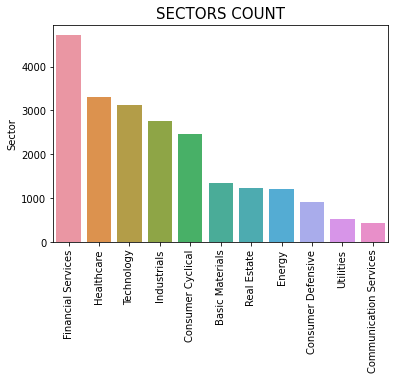

In [ ]:
sector = dataFrame['Sector'].value_counts()
sbn.barplot(np.arange(len(sector)), sector)
plt.xticks(np.arange(len(sector)), sector.index.values.tolist(), rotation=90)
plt.title('SECTORS COUNT', fontsize=15)
plt.show()

## Encoding independent variable

In [ ]:
categorical_cols = ["Corporation","Sector"] 

from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
dataFrame[categorical_cols] = dataFrame[categorical_cols].apply(lambda col: le.fit_transform(col))  

In [ ]:
dataFrame

,Corporation,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,...,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%],Class
0,3550,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.0,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,2.851000e+09,1.420000e+08,-1.127000e+09,1.164300e+10,0.0,1.164300e+10,4.1900,4.010,2.705960e+09,2.705960e+09,2.448,0.4754,0.247000,0.2043,0.156000,0.1359,1.834400e+10,1.520300e+10,1.178500e+10,0.1948,0.1565,8.558000e+09,2.128000e+09,1.068600e+10,6.386000e+09,6.759000e+09,3.161700e+10,2.230400e+10,8.454700e+10,...,-0.1185,-0.0001,0.0067,0.0293,0.0371,0.0389,-0.012700,189.61097,0.0699,-0.0615,-0.0695,0.032300,0.008800,-0.018200,0.035500,0.00150,0.026000,0.060300,-0.013700,0.006000,0.144200,0.035300,0.020100,0.10130,0.083400,0.075100,-0.018700,-0.021700,0.035900,0.031600,0.122800,0.0000,-0.1746,3,-9.323276,103.077642,365.025973,-4.461547,20.803948,0
1,4695,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,108330319.7,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,3.955957e+07,-1.431918e+07,0.000000e+00,1.358227e+08,0.0,1.358227e+08,0.2396,0.226,2.631767e+08,1.829362e+07,0.000,0.2487,0.010700,0.0502,0.005800,0.0704,2.456858e+08,1.875310e+08,1.215036e+08,0.0470,0.0364,7.735149e+08,6.083852e+08,1.381900e+09,1.169487e+07,5.793193e+08,2.134397e+09,3.085975e+08,1.906587e+08,...,1.2489,1.6142,1.9463,1.5649,1.4625,1.4646,0.018400,0.01950,0.0000,0.2134,-0.3626,0.021051,0.028228,0.040704,0.037766,0.04725,0.064219,0.030847,0.056921,0.072423,0.033468,0.039182,0.047642,-0.02619,-0.000596,0.012298,10.978239,0.158858,1.134221,0.783208,3.733922,1.6484,1.7313,3,-25.512193,103.077642,365.025973,-4.461547,20.803948,0
2,2570,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.0,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,2.270000e+09,7.510000e+08,1.200000e+07,0.000000e+00,1.519000e+09,0.0,1.519000e+09,1.4700,1.450,1.033053e+09,1.028000e+09,0.307,0.2057,0.045000,0.0276,0.015000,0.0126,4.416000e+09,2.713000e+09,1.531000e+09,0.0231,0.0154,4.010000e+08,0.000000e+00,4.010000e+08,1.116000e+09,5.651000e+09,8.830000e+09,1.689300e+10,2.837000e+09,...,0.0173,-0.0145,-0.0141,0.0147,0.0576,0.0469,-0.035600,-0.03170,0.2429,0.2095,0.3935,0.102700,0.103800,0.139900,0.088900,0.09370,0.094600,0.227200,0.090600,0.189200,0.067600,0.055800,0.078900,0.00000,0.121500,0.163300,0.061800,0.098100,0.188600

### Splitting the dataset into test and train set

In [ ]:
X = dataFrame.iloc[:, :-1].values
y = dataFrame.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-3.19601249e-01, -1.15401368e-01, -1.21914360e-02, ...,
         1.56688856e-01, -2.87705405e-04, -1.51496756e-03],
       [-4.79484578e-01, -1.61713366e-01, -1.09292652e-02, ...,
         1.56688856e-01, -5.94923693e-02, -1.51496756e-03],
       [-9.90725181e-02,  1.26273147e-01, -1.17557368e-02, ...,
        -6.92605364e-01, -2.87705405e-04, -1.51496756e-03],
       ...,
       [ 9.59465388e-01,  1.28189030e-01, -1.22200805e-02, ...,
         1.56688856e-01, -2.87705405e-04, -1.51496756e-03],
       [-1.29395219e-01, -1.63429319e-01, -1.23268193e-02, ...,
         1.56688856e-01, -2.87705405e-04, -1.51496756e-03],
       [-2.89967700e-01,  4.40345103e-02, -1.17910149e-02, ...,
         1.56688856e-01,  2.08003370e-02, -1.51496756e-03]])

In [ ]:
X_test

array([[ 5.37015039e-01, -1.67882404e-01, -1.22604845e-02, ...,
         1.56688856e-01,  2.81989121e-02, -1.51496756e-03],
       [ 1.02286740e+00, -5.34540406e-02, -1.20255989e-02, ...,
        -6.93309379e-01, -2.87705405e-04, -1.51496756e-03],
       [ 1.13244261e+00,  4.32905597e-01, -1.20831896e-02, ...,
         1.56688856e-01, -2.87705405e-04, -1.51496756e-03],
       ...,
       [ 2.95811740e-01, -1.41714777e-01, -1.19173525e-02, ...,
         1.56688856e-01, -2.87705405e-04, -1.51496756e-03],
       [ 1.68789935e+00, -1.68452385e-01, -1.20856018e-02, ...,
         1.56688856e-01, -2.87705405e-04, -1.68497345e+00],
       [ 8.18878322e-01, -9.20174340e-02, -7.58327660e-03, ...,
         1.56688856e-01, -1.70520733e-01, -1.51496756e-03]])

In [ ]:
y_train

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
y_test

array([1, 0, 1, ..., 1, 0, 0])

### Create a Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
model = Sequential()

model.add(Dense(units=70,activation = "relu"))
model.add(Dropout(0.6))
model.add(Dense(units=60,activation = "relu"))
model.add(Dropout(0.6))
model.add(Dense(units=50,activation = "relu"))
model.add(Dropout(0.6))
model.add(Dense(units=1,activation = "sigmoid"))

model.compile(loss="binary_crossentropy",optimizer = "adam")


In [ ]:
earlyStopping = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [ ]:
model.fit(x=X_train, y=y_train, epochs = 150, validation_data = (X_test,y_test), verbose = 1, callbacks=[earlyStopping])

### Visualize the loss function

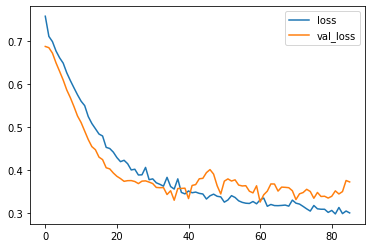

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Predict the test set

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
y_pred = model.predict_classes(X_test)
y_pred = y_pred.reshape(len(y_test),)
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Test accuracy :",accuracy_score(y_test, y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1969
           1       0.84      0.93      0.88      2447

    accuracy                           0.86      4416
   macro avg       0.87      0.85      0.86      4416
weighted avg       0.86      0.86      0.86      4416

[[1525  444]
 [ 176 2271]]
Test accuracy : 0.8596014492753623


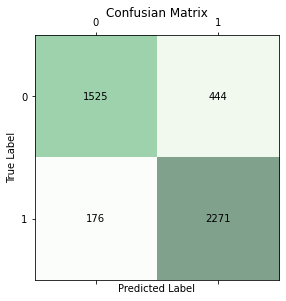

In [ ]:
fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(cm, cmap=plt.cm.Greens, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,
            s=cm[i, j], 
            va='center', ha='center')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Confusian Matrix")
plt.show()